# Part I - (Dataset Exploration Title)
## by (Mojde Bay)

## Introduction
> PISA is a survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a
conventional school test. Rather than examining how well
students have learned the school curriculum, it looks at how
well prepared they are for life beyond school.
Around 510,000 students in 65 economies took part in the
PISA 2012 assessment of reading, mathematics and science
representing about 28 million 15-year-olds globally. Of those
economies, 44 took part in an assessment of creative problem
solving and 18 in an assessment of financial literacy.








## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


# at the top of the file, before other imports
import warnings

warnings.filterwarnings('ignore')

# no warnings will be printed from now on.

In [2]:

pisa = pd.read_csv('pisa2012.csv', encoding='ISO-8859-1')
pisa.head(5)

Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
0           1  Albania     80000  ALB0006  Non-OECD  Albania         1   
1           2  Albania     80000  ALB0006  Non-OECD  Albania         1   
2           3  Albania     80000  ALB0006  Non-OECD  Albania         1   
3           4  Albania     80000  ALB0006  Non-OECD  Albania         1   
4           5  Albania     80000  ALB0006  Non-OECD  Albania         1   

   STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0        1       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
1        2       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
2        3        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
3        4        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
4        5        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   

   W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0    4.3389  13.0829       19        1     0.2098  22NOV13  
1    4.3389  13.0829       19        1     0.2098  22NOV13  
2    4.2436  12.7307       19        1     0.1999  22NOV13  
3    4.2436  12.7307       19        1     0.1999  22NOV13  
4    4.2436  12.7307       19        1     0.1999  22NOV13  

[5 rows x 636 columns]

In [3]:
# initial investigation into data format
pisa.shape


(485490, 636)

In [4]:
pisa.dtypes


Unnamed: 0      int64
CNT            object
SUBNATIO        int64
STRATUM        object
OECD           object
               ...   
W_FSTR80      float64
WVARSTRR        int64
VAR_UNIT        int64
SENWGT_STU    float64
VER_STU        object
Length: 636, dtype: object

In [4]:
pisa.duplicated().sum()

0

In [6]:
pisa['CNT'].nunique()

68

In [8]:
pisa['CNT'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [5]:
# make a copy of the dataset so as to keep the original one intact.
pisa_clean = pisa.copy()

In [6]:
# Cleaning up the 'CNT' column

#'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)' should be renamed as 'United States of America'.
pisa_clean.loc[pisa_clean['CNT']=='Florida (USA)', 'CNT'] = 'United States of America'
pisa_clean.loc[pisa_clean['CNT']=='Connecticut (USA)', 'CNT'] = 'United States of America'
pisa_clean.loc[pisa_clean['CNT']=='Massachusetts (USA)', 'CNT'] = 'United States of America'

# 'Perm(Russian Federation)' should be renamed as 'Russian Federation'.
pisa_clean.loc[pisa_clean['CNT']=='Perm(Russian Federation)', 'CNT'] = 'Russian Federation'

In [7]:
pisa_clean['CNT'].nunique()

64

###### What is the structure of your dataset?

There are 485,490 students covered in the dataset with 636 features. Students from 64 countries have been involved in this investigation. The variables are either qualitative (such as parents' educational qualifications), or numeric in nature (such as maths, reading and science scores).



### What is/are the main feature(s) of interest in your dataset?




#### Student 

identification (STIDSTD)

country of residence (OECD, NC)
                    
gender (ST04Q01)

enrollment in preschool (ST05Q01)

age at which education began (ST06Q01)

immigration status (IMMIG, CULTDIST)

access to education resources (HEDRES)

academic measurements (PV1MATH, PV1READ, PV1SCIE)



 #### Family 
parental levels of education (HISCED, FISCED, MISCED)

parental employment (HISEI, OCOD2, OCOD1, BFMJ2, BMMJ1)

status (ESCS)

structure (FAMSTRUC)

#### School 
academic routines (LMINS, MMINS, SMINS - Learning time (minutes per week))


#### Media
Access to internet, laptop and cellphone (IC01Q01, IC01Q02, IC01Q03, IC01Q04, IC01Q05, IC01Q06, IC01Q07)









### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Students need welfare and peace to have better performances, I believe. I would like to see the effect of the family's social status and structure and the country's social status in the children's performance. Of course, I might investigate some other features that I think will have influence on children's performance.


### Feature Engineering
#### Overall academic performance in each subject

PV1MATH to PV5MATH are for mathematical literacy

PV1SCIE to PV5SCIE for scientific literacy

PV1READ to PV5READ for reading literacy

Now I will create 3 variables each of which will be created from average of 5 plausible variables found in each of mathematical, scientific, reading literacy, as shown below. The following 3 variables that will be created are called:

'Avg_Math_Literacy'

'Avg_Scientific_Literacy'

'Avg_Reading_Literacy

#### Overall academic performance (all three subject: math, reading and scinece)

'Avg_academia'

#### Average minutes spent on educating all three subjects
'Avg_edu_mins'

In [8]:
pisa_clean[['PV1MATH','PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH']].describe()

PV1MATH        PV2MATH        PV3MATH        PV4MATH  \
count  485490.000000  485490.000000  485490.000000  485490.000000   
mean      469.621653     469.648358     469.648930     469.641832   
std       103.265391     103.382077     103.407631     103.392286   
min        19.792800       6.473000      42.226200      24.622200   
25%       395.318600     395.318600     395.240700     395.396500   
50%       466.201900     466.124000     466.201900     466.279800   
75%       541.057800     541.447300     541.291500     541.447300   
max       962.229300     957.010400     935.745400     943.456900   

             PV5MATH  
count  485490.000000  
mean      469.695396  
std       103.419170  
min        37.085200  
25%       395.240700  
50%       466.435600  
75%       541.447300  
max       907.625800

In [9]:
pisa_clean['Avg_Math_Literacy'] = pisa_clean[['PV1MATH','PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH']].mean(axis=1)

In [10]:
pisa_clean['Avg_Scientific_Literacy'] = pisa_clean[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)

In [11]:
pisa_clean['Avg_Reading_Literacy'] = pisa_clean[['PV1READ','PV2READ','PV3READ', 'PV4READ', 'PV5READ']].mean(axis=1)

In [12]:
# calculate an academic average for each student
pisa_clean['Avg_academia'] = (pisa_clean.Avg_Math_Literacy + pisa_clean.Avg_Scientific_Literacy + pisa_clean.Avg_Reading_Literacy)/3

In [13]:

pisa_clean['Avg_edu_mins'] = pisa_clean[['LMINS','MMINS','SMINS']].mean(axis=1)


In [14]:
# identify columns of interest and appropriate column names
cols = {'STIDSTD':'student_id',
        'ST04Q01':'gender',
        'OECD':'oecd',
        'NC':'country',
        'ST05Q01':'preschool',
        'ST06Q01':'age_edu_start',
        'IMMIG':'immigration',
        'EC06Q01':'age_lang_start',
        'HISCED':'parent_edu',
        'HISEI':'parent_occ', 
        'ESCS':'status_index',
        'FAMSTRUC':'fam_struct',
        'HEDRES':'home_edu_res',
        'Avg_Math_Literacy':'avg_math_score',
        'Avg_Reading_Literacy':'avg_read_score',
        'Avg_Scientific_Literacy':'avg_science_score', 
        'LMINS':'lang_min',
        'MMINS':'math_min',
        'SMINS':'science_min',
        'IC01Q01' : 'Desktop_at_Home',
        'IC01Q02' : 'Portable_Laptop_at_Home',
        'IC01Q03' : 'Tablet_Computer_at_Home',  
        'IC01Q04' : 'Internet_Connection',   
        'IC01Q05' : 'Video_Games_Console',  
        'IC01Q06' : 'at_Home_Cell_phone_w/o_Internet',
        'IC01Q07' : 'at_Home_Cell_phone_with_Internet',
        'Avg_academia' : 'academic_avg', 
        'Avg_edu_mins': 'Avg_edu_mins'}


   


# gather only the columns of interest
subpisa = pisa_clean.loc[:,cols]
# rename columns with more descriptive titles
subpisa.rename(columns=cols, inplace=True)

In [15]:
subpisa.sample(10)

student_id  gender      oecd                country  \
263026       22437  Female      OECD                  Italy   
166395       20813    Male      OECD                  Spain   
12075         7333    Male  Non-OECD  United Arab Emirates    
207969        1069    Male  Non-OECD        Hong Kong-China   
484873        4343  Female  Non-OECD              Viet Nam    
268819       28230    Male      OECD                  Italy   
257209       16620  Female      OECD                  Italy   
455820        1444  Female  Non-OECD              Thailand    
184409        8735    Male      OECD                Finland   
125372        2201  Female  Non-OECD            Costa Rica    

                          preschool  age_edu_start        immigration  \
263026  Yes, for more than one year            6.0             Native   
166395  Yes, for more than one year            6.0             Native   
12075                          No              4.0             Native   
207969  Yes, for more than one year            6.0  Second-Generation   
484873   Yes, for one year or less             7.0             Native   
268819  Yes, for more than one year            6.0             Native   
257209   Yes, for one year or less             6.0  Second-Generation   
455820  Yes, for more than one year            6.0             Native   
184409  Yes, for more than one year            7.0             Native   
125372                         No              6.0             Native   

        age_lang_start         parent_edu  parent_occ  ...  science_min  \
263026             NaN        ISCED 5A, 6       86.72  ...        120.0   
166395             NaN           ISCED 5B       27.91  ...        300.0   
12075              NaN  ISCED 3A, ISCED 4       71.39  ...          NaN   
207969    4 to 6 years           ISCED 5B       25.04  ...         60.0   
484873             NaN            ISCED 2       11.01  ...          NaN   
268819             NaN        ISCED 5A, 6       73.91  ...        100.0   
257209  10 to 12 years        ISCED 3B, C       21.64  ...        104.0   
455820             NaN        ISCED 5A, 6       70.34  ...          NaN   
184409             NaN           ISCED 5B       61.07  ...        360.0   
125372             NaN            ISCED 1       32.20  ...        240.0   

          Desktop_at_Home  Portable_Laptop_at_Home  Tablet_Computer_at_Home  \
263026                 No        Yes, and I use it        Yes, and I use it   
166395  Yes, and I use it  Yes, but I dont use it                       No   
12075                 NaN                      NaN                      NaN   
207969  Yes, and I use it        Yes, and I use it        Yes, and I use it   
484873                NaN                      NaN                      NaN   
268819  Yes, and I use it        Yes, and I use it        Yes, and I use it   
257209  Yes, and I use it        Yes, and I use it                       No   
455820                NaN                      NaN                      NaN   
184409  Yes, and I use it  Yes, but I dont use it  Yes, but I dont use it   
125372                 No        Yes, and I use it                       No   

        Internet_Connection      Video_Games_Console  \
263026    Yes, and I use it        Yes, and I use it   
166395    Yes, and I use it        Yes, and I use it   
12075                   NaN                      NaN   
207969    Yes, and I use it        Yes, and I use it   
484873                  NaN                      NaN   
268819    Yes, and I use it        Yes, and I use it   
257209    Yes, and I use it  Yes, but I dont use it   
455820                  NaN                      NaN   
184409    Yes, and I use it        Yes, and I use it   
125372    Yes, and I use it        Yes, and I use it   

        at_Home_Cell_phone_w/o_Internet  at_Home_Cell_phone_with_Internet  \
263026                Yes, and I use it                                No   
166395                Yes, and I use it    

In [16]:
subpisa.dtypes

student_id                            int64
gender                               object
oecd                                 object
country                              object
preschool                            object
age_edu_start                       float64
immigration                          object
age_lang_start                       object
parent_edu                           object
parent_occ                          float64
status_index                        float64
fam_struct                          float64
home_edu_res                        float64
avg_math_score                      float64
avg_read_score                      float64
avg_science_score                   float64
lang_min                            float64
math_min                            float64
science_min                         float64
Desktop_at_Home                      object
Portable_Laptop_at_Home              object
Tablet_Computer_at_Home              object
Internet_Connection             

In [17]:
# Change the object type to category for columns which should be category but are not. 
# There are some other columns like OECD, parents' education level and preschool which will transform during the exploratory process.

subpisa['gender'] = subpisa.gender.astype('category')

subpisa['Desktop_at_Home'] = subpisa.Desktop_at_Home.astype('category')
subpisa['Portable_Laptop_at_Home'] = subpisa.Portable_Laptop_at_Home.astype('category')
subpisa['Tablet_Computer_at_Home'] = subpisa.Tablet_Computer_at_Home.astype('category')
subpisa['Internet_Connection'] = subpisa.Internet_Connection.astype('category')
subpisa['Video_Games_Console'] = subpisa.Video_Games_Console.astype('category')
subpisa['at_Home_Cell_phone_w/o_Internet'] = subpisa['at_Home_Cell_phone_w/o_Internet'].astype('category')
subpisa['at_Home_Cell_phone_with_Internet'] = subpisa.at_Home_Cell_phone_with_Internet.astype('category')

In [18]:
subpisa.age_lang_start.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [19]:
#check if there are genders other than male or female.
subpisa.gender.value_counts()

Female    245064
Male      240426
Name: gender, dtype: int64

In [20]:
subpisa.describe()

student_id  age_edu_start     parent_occ   status_index  \
count  485490.000000  457994.000000  450621.000000  473648.000000   
mean     6134.066201       6.148963      48.923298      -0.265546   
std      6733.144944       0.970693      22.120953       1.131791   
min         1.000000       4.000000      11.010000      -5.950000   
25%      1811.000000       6.000000      28.520000      -1.000000   
50%      3740.000000       6.000000      48.820000      -0.190000   
75%      7456.000000       7.000000      70.340000       0.610000   
max     33806.000000      16.000000      88.960000       3.690000   

          fam_struct   home_edu_res  avg_math_score  avg_read_score  \
count  429058.000000  477772.000000   485490.000000   485490.000000   
mean        1.889355      -0.195442      469.651234      472.006964   
std         0.385621       1.074053      100.786610       98.863310   
min         1.000000      -3.930000       54.767080        6.445400   
25%         2.000000      -0.690000      396.019620      405.044200   
50%         2.000000       0.040000      465.734520      475.477980   
75%         2.000000       1.120000      540.123060      542.831195   
max         3.000000       1.120000      903.107960      849.359740   

       avg_science_score       lang_min       math_min    science_min  \
count      485490.000000  282866.000000  283303.000000  270914.000000   
mean          475.808094     219.276636     226.007056     211.122460   
std            97.998470      97.997730      97.448421     131.368322   
min            25.158540       0.000000       0.000000       0.000000   
25%           405.762800     165.000000     180.000000     120.000000   
50%           475.512860     200.000000     220.000000     180.000000   
75%           546.381920     250.000000     250.000000     270.000000   
max           857.832900    2400.000000    3000.000000    2975.000000   

        academic_avg   Avg_edu_mins  
count  485490.000000  291055.000000  
mean      472.488764     219.407685  
std        96.036271      90.462553  
min        77.114593       0.000000  
25%       403.992595     166.666667  
50%       472.046460     210.000000  
75%       541.455700     250.000000  
max       826.592027    2400.000000

In [21]:
subpisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   student_id                        485490 non-null  int64   
 1   gender                            485490 non-null  category
 2   oecd                              485490 non-null  object  
 3   country                           485490 non-null  object  
 4   preschool                         476166 non-null  object  
 5   age_edu_start                     457994 non-null  float64 
 6   immigration                       471793 non-null  object  
 7   age_lang_start                    40345 non-null   object  
 8   parent_edu                        473091 non-null  object  
 9   parent_occ                        450621 non-null  float64 
 10  status_index                      473648 non-null  float64 
 11  fam_struct                        42905

In [22]:
# which percenage of each columns is null values. 
subpisa.isnull().sum().sort_values(ascending=False)/485490*100

age_lang_start                      91.689839
science_min                         44.197821
lang_min                            41.735978
math_min                            41.645966
Avg_edu_mins                        40.049229
at_Home_Cell_phone_w/o_Internet     39.283404
Tablet_Computer_at_Home             39.112649
at_Home_Cell_phone_with_Internet    39.006777
Video_Games_Console                 38.909761
Desktop_at_Home                     38.829430
Portable_Laptop_at_Home             38.810686
Internet_Connection                 38.761869
fam_struct                          11.623720
parent_occ                           7.182228
age_edu_start                        5.663556
immigration                          2.821273
parent_edu                           2.553915
status_index                         2.439185
preschool                            1.920534
home_edu_res                         1.589734
academic_avg                         0.000000
student_id                        

More than 90% of the data is missing in age_lang_start. However, I keep the column because I need to do some investigations on it and half of bread is better than none.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



### General Data

#### The Question to be answered here:

Explore the data to find out what percentage of the students are female/male?

How is the distribution of the data regarding the countries?

What percentage of countries are/are not part of OECD?


#### The Question to be answered in bivariable anaysis:

How do these distributions affect the student's performance?

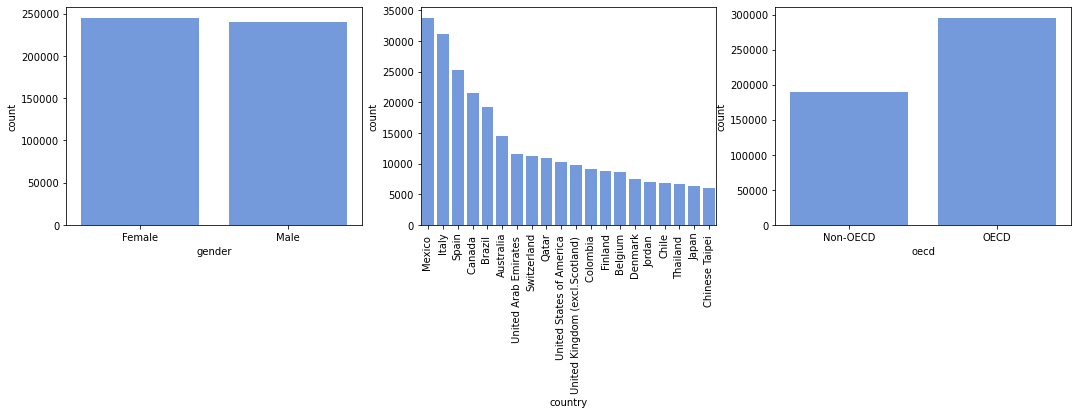

In [23]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sb.countplot(data = subpisa, x = 'gender', color = 'cornflowerblue');
plt.subplot(132)
sb.countplot(data = subpisa, x = 'country', order=subpisa.country.value_counts().iloc[:20].index, color = 'cornflowerblue');
plt.xticks(rotation = 90)
plt.subplot(133)
sb.countplot(data = subpisa, x = 'oecd', color = 'cornflowerblue');

#### Answer:
Data is evenly split between genders. We can group the population of students in almost half-gender and half-male.

The chart for the countries contributed in this project is skwed towards North America and Europe. More countries from these regions have been contributed in this project. This sounds reasonable since  number of OECD countries in this projcet is clearly more than Non-OECD countries and OECD countries are mostly europian and north American.



## Math, Science and reading Scores
Examine the distributions of the math, reading, and science evaluations of student performance.

####  Questions to be answered here:
What are the trends? Are there any noticeable differences in the distributions?

#### Questions to be answered in bivariable analysis:
What cause the peak and what causes the lowest scores?

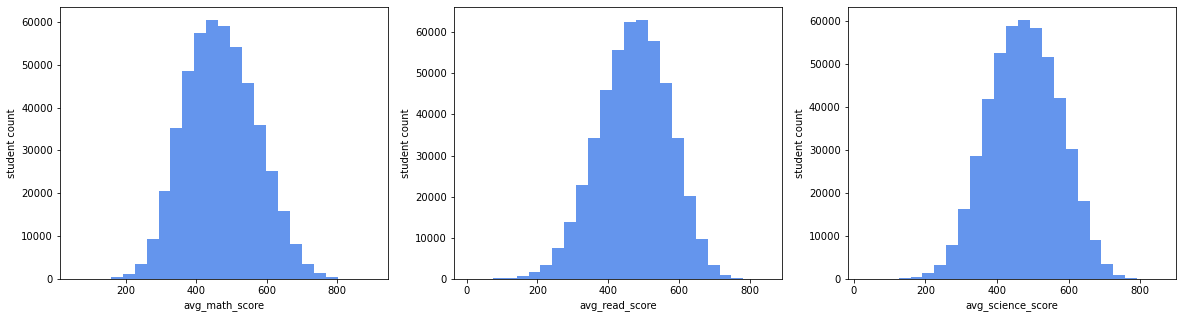

In [34]:
# Create histograms of all students' test scores
fig, ax = plt.subplots(1,3, figsize = [20,5])
variables = ["avg_math_score", "avg_read_score", "avg_science_score"]
for i in range(len(variables)):
    var = variables[i]
    ax[i].hist(data = subpisa, x = var, bins = 25, color = 'cornflowerblue')
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('student count')
plt.show()

#### Answer:
All three evaluations are Normally distributed with centers around 500. 

# The time devoted to instructing students
Examine the distribution of instructional minutes of math, language, and science. 

#### Questions to be answered here:
What subjects receive the most minutes? 

Any wierd trends?

#### Questions to be answered in bivariable analysis:
How do these times influence the student's performance? More minutes , better performance?

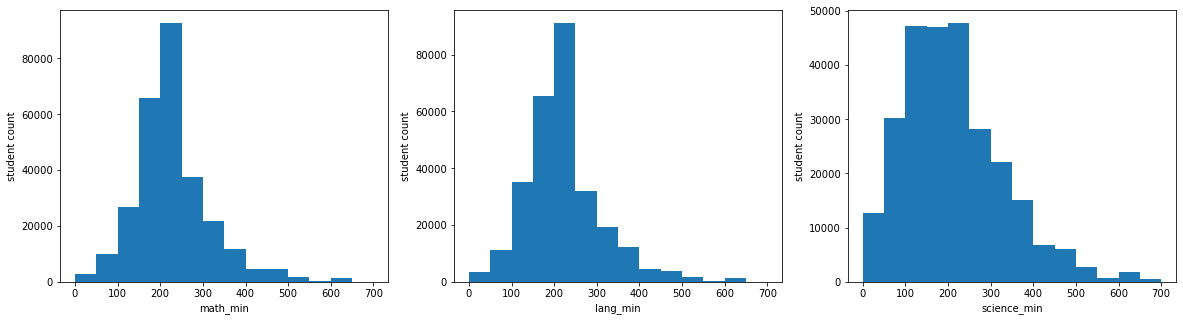

In [35]:
# Create histograms of all students' test scores
fig, ax = plt.subplots(1,3, figsize = [20,5])
variables = ["math_min", "lang_min", "science_min"]
for i in range(len(variables)):
    bins = np.arange(0,710,50)
    var = variables[i]
    ax[i].hist(data = subpisa, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('student count')
plt.show()




#### Answer:
Instructional time seems to be normally spread in math and language, 150-250 minutes per week. However,instructional time for science varies more from student to student.

# Immigration
Examine the distribution of the immigration background. 

#### Questions to be answered here:
Are most of the students native to the country they reside in? 

In case of having an immigration background, to which group do they belong? seconf or fisrt generation?


#### Questions to be answered in bivariable analysis:
How does having an immigration background affect the performance? 

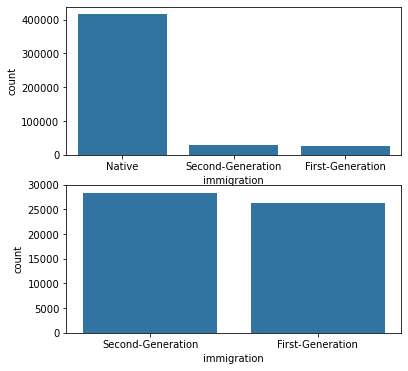

In [36]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(6,6))
plt.subplot(211)
sb.countplot(data = subpisa, x = 'immigration', color = base_color);
plt.subplot(212)
sb.countplot(data = subpisa[subpisa.immigration.isin(['Second-Generation','First-Generation'])], x = 'immigration', color = base_color)
plt.ylim(0,30000);

### Answer:
Most of the students in the data set are native to their country.


# Parental Education and Employment
Investigate the levels of education and employment of parents. 

#### Questions to be answered here:
What are the most common levels of educational achievement and occupation?



#### Questions to be answered in bivariable analysis:
Is there any relationship between parents income or level of education and the student's performance? 

In [37]:
# organize the levels of parent education in ordered data
levels = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
subpisa['parent_edu'] = subpisa['parent_edu'].astype(edu_levels)


<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

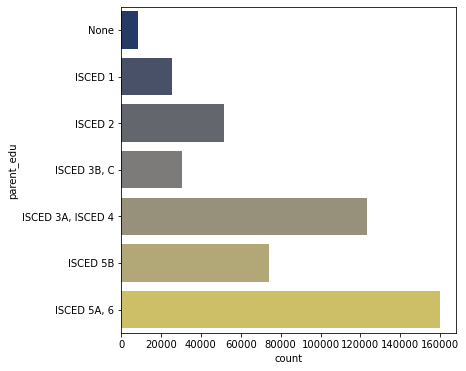

In [38]:
plt.figure(figsize=(6,6))
xticks = np.arange(0,170000,20000)
xlabels = ['0k','20k','40k','60k','80k','100k','120k','140k','160k']
sb.countplot(data = subpisa, y = 'parent_edu', palette = 'cividis')
plt.xticks


In [39]:
subpisa[['parent_edu']].describe()

parent_edu
count        473091
unique            7
top     ISCED 5A, 6
freq         159942

### Answer:
Spikes occur at lower secondary (ISCED 2), upper secondary (ISCED 3A or 4), and university or graduate studies (ISCED 5A or 6) with most parents having a degree.

Text(0.5, 0, 'Highest Parental Occupation')

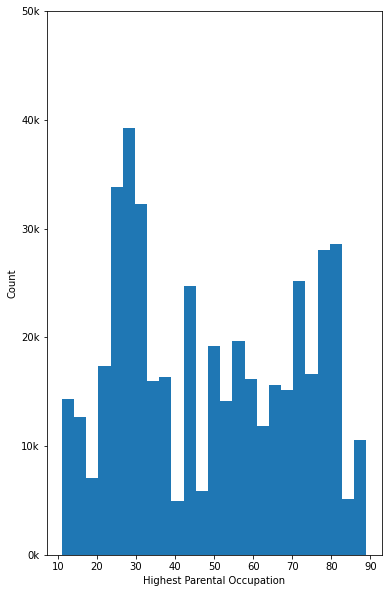

In [40]:
yticks = np.arange(0,51000,10000)
ylabels = ['0k','10k','20k','30k','40k','50k']
plt.figure(figsize=(6,10))

plt.hist(subpisa.parent_occ, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Highest Parental Occupation')


### Answer:
Distribution of occupational level for parents has a multimodal shape with a mean of approximately 49 and a standard deviation of 22 (with a minumum of 11 and maximum of 89). 


In [41]:
subpisa[['parent_occ']].describe()

parent_occ
count  450621.000000
mean       48.923298
std        22.120953
min        11.010000
25%        28.520000
50%        48.820000
75%        70.340000
max        88.960000

# Educational Beginnings
Investigate when the students' education began. 

#### Questions to be answered here:
What percentage of the children attend preschool before going to school?

At which age do children start formal education?


#### Questions to be answered in bivariable analysis:
Is there any relationship between preschooling and the student's performance? 

Does beginning formal education improve the performance? 

In [42]:
subpisa['preschool'].unique()

array(['No  ', 'Yes, for more than one year',
       'Yes, for one year or less ', nan], dtype=object)

In [43]:
levels = ['No  ', 'Yes, for one year or less ', 'Yes, for more than one year']
preschool_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
subpisa['preschool'] = subpisa['preschool'].astype(preschool_levels)

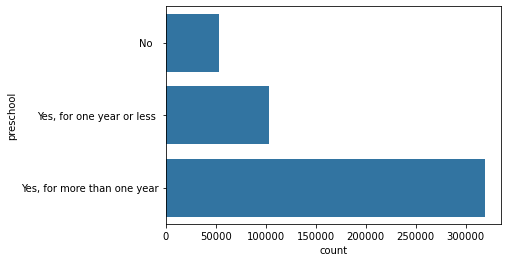

In [44]:
sb.countplot(data = subpisa, y = 'preschool', color = base_color);

### Answer: 
Most of the students had attended preschool. A majority of the students participated in a preschool for more than one year.

In [45]:
subpisa.age_edu_start.isnull().shape
subpisa.preschool.isnull().shape


(485490,)

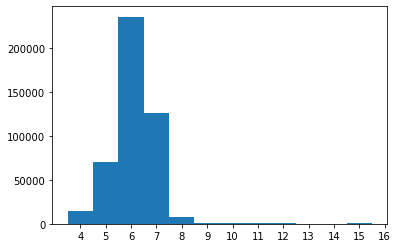

In [46]:
bins = np.arange(4, 17, 1)
plt.hist(subpisa['age_edu_start'], bins = bins)
plt.xticks(bins+0.5, bins);

### Answer:
Data does not exist for most of the students in the study, but for those with data,Most children began their formal education around 6. 

# Family Structure
Distribution of family structure and social status. 


#### Questions to be answered here:
Do children mostly live with two parents or not? 

How is social status distributed across families of these students?



#### Questions to be answered in bivariable analysis:
Is there any relationship between the number of parents and the student's performance? 

Is there any relationship between the socio-economic status of the family and the student's performance? 

In [47]:
subpisa.fam_struct.value_counts()

2.0    360003
1.0     58264
3.0     10791
Name: fam_struct, dtype: int64

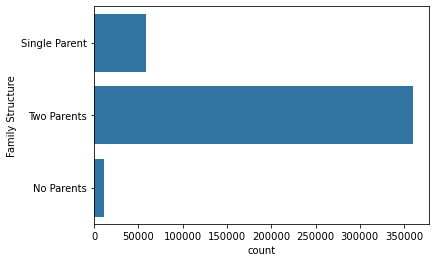

In [48]:
g = sb.countplot(data = subpisa, y = 'fam_struct', color = base_color)
g.set_yticklabels(['Single Parent','Two Parents','No Parents'])
plt.ylabel('Family Structure');

### Answer: 
A great majority of the students have a two-parent household, but there are still considerable amounts of students in single-parent household and other family arrangements. 

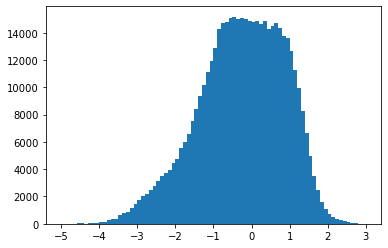

In [49]:
plt.hist(subpisa.status_index, bins = np.arange(-5,3.1,0.1));

### Answer:
The index of social, economic, and cultural status above has a left-skew diagram, resulting in being more likely to have a score between -4 and -2 than a score between 2 and 4. 

In [50]:
subpisa.status_index.describe()

count    473648.000000
mean         -0.265546
std           1.131791
min          -5.950000
25%          -1.000000
50%          -0.190000
75%           0.610000
max           3.690000
Name: status_index, dtype: float64

# Media

Investigate the access of the students to tablet, cellphone and internet.

#### Questions to be answered here:

How much do the students have access to tablet, desktop, cellphone and internet?



#### Questions to be answered in bivariable analysis:

IS this access to internet and cellphone harmful to their academic performance? 

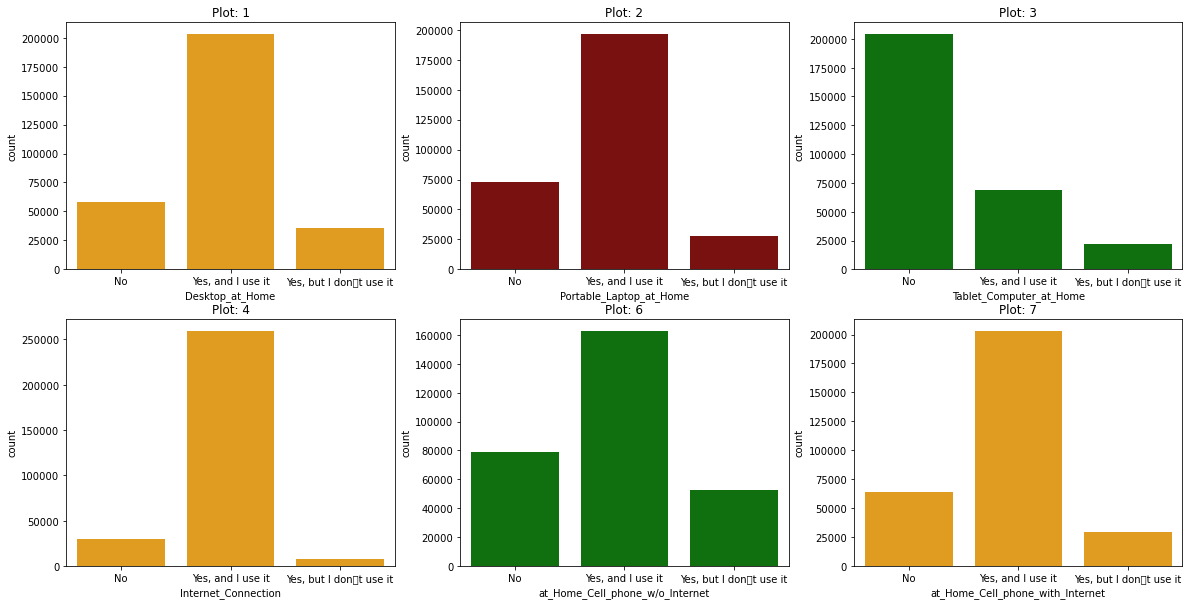

In [24]:

fig, ax = plt.subplots(2,3, figsize=(20, 10))



sb.countplot(data=subpisa, x= 'Desktop_at_Home', color='orange', ax=ax[0][0]);
ax[0][0].title.set_text('Plot: 1')

sb.countplot(data=subpisa, x= 'Portable_Laptop_at_Home', color='darkred', ax=ax[0][1]);
ax[0][1].title.set_text('Plot: 2')

sb.countplot(data=subpisa, x= 'Tablet_Computer_at_Home', color='green', ax=ax[0][2]);
ax[0][2].title.set_text('Plot: 3')

sb.countplot(data=subpisa, x= 'Internet_Connection', color='orange', ax=ax[1][0]);
ax[1][0].title.set_text('Plot: 4')


sb.countplot(data=subpisa, x= 'at_Home_Cell_phone_w/o_Internet', color='green', ax=ax[1][1]);
ax[1][1].title.set_text('Plot: 6')

sb.countplot(data=subpisa, x= 'at_Home_Cell_phone_with_Internet', color='orange', ax=ax[1][2]);
ax[1][2].title.set_text('Plot: 7')

### Answer:
Most students have access to internet, laptop and cellphone and they use it.

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
  
No transformations were necessary so far since almost all datasets were normally distributed with no outliers thus no transformations was needed. 



# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Parental occupation has an unusual distribution. 

Many variables were converted from strings to ordinal categorical variables to further aid additional analysis. This allows the categories to show up in their logical order, which improves the readability of the graphs and subsequent analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

# Gender Effect

#### Questions to be answered here:
Are there any noticeable differences in academic performance regarding the genders? 

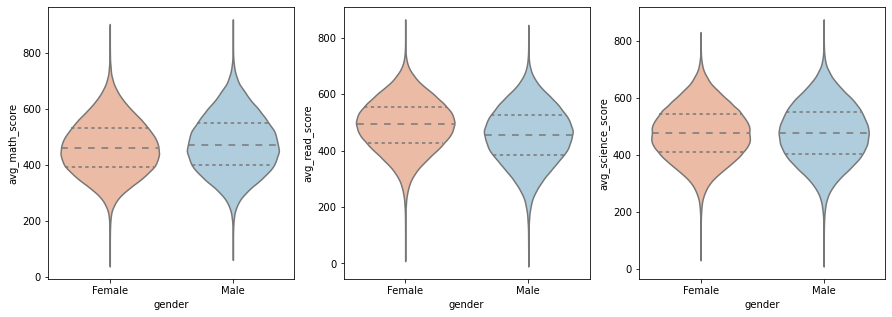

In [76]:
plt.figure(figsize = (15,5))
plt.subplot(131)
# graph the distribution of math performance according to gender
sb.violinplot(data = subpisa, x = 'gender', y = 'avg_math_score', palette = 'RdBu', inner = 'quartile');
plt.subplot(132)
# graph the distribution of reading performance according to gender
sb.violinplot(data = subpisa, x = 'gender', y = 'avg_read_score', palette = 'RdBu', inner = 'quartile');
plt.subplot(133)
# graph the distribution of science performance according to gender
sb.violinplot(data = subpisa, x = 'gender', y = 'avg_science_score', palette = 'RdBu', inner = 'quartile');


# almost the same. in reading girls perform a bit better. 
Girls and boys perform almost the same in three fields except that girls performance in reading is a bit better than boys. This might be due to the fact that females process reading in both sides of the brain.

# Country Performance and Status
In this part we will look at the performance of the countries. We will group the students by their country to get an overall view of each country's performance in each different academic subject.
Simeltanousely, we will investigate if the performance of each country is accordant with its socio-economc status.
I expect to see that wealthier countries perform better because of accessing to better resources.

#### Questions to be answered here:
Are the connections between social status and academic performance across all countries?

In [77]:
# gather the names of the 30 most represented countries in this study
top_countries = subpisa.country.value_counts().iloc[:30].index
# gather the mean data for each of those 25 most represented countries to use in this subset of analysis
subpisa_cnt = subpisa.groupby('country').mean()[subpisa.groupby('country').mean().index.isin(top_countries)]
subpisa_cnt.head(3)

student_id  age_edu_start  parent_occ  status_index  fam_struct  \
country                                                                      
Argentina      2954.5       5.905549   45.448089     -0.626649    1.823185   
Australia      7241.0       5.205203   56.649833      0.189072    1.870798   
Belgium        4299.0       5.892964   52.165685      0.175149    1.878058   

           home_edu_res  avg_math_score  avg_read_score  avg_science_score  \
country                                                                      
Argentina     -0.437513      395.635711      403.596060         410.478404   
Australia     -0.004287      493.268939      501.056931         511.638212   
Belgium        0.114331      519.668410      512.281728         510.302595   

             lang_min    math_min  science_min  academic_avg  Avg_edu_mins  
country                                                                     
Argentina  266.146698  278.499787   222.214189    403.236725    264.422805  
Australia  233.019440  235.801302   227.791550    501.988027    233.401965  
Belgium    217.177139  216.420305   190.755675    514.084244    208.447282

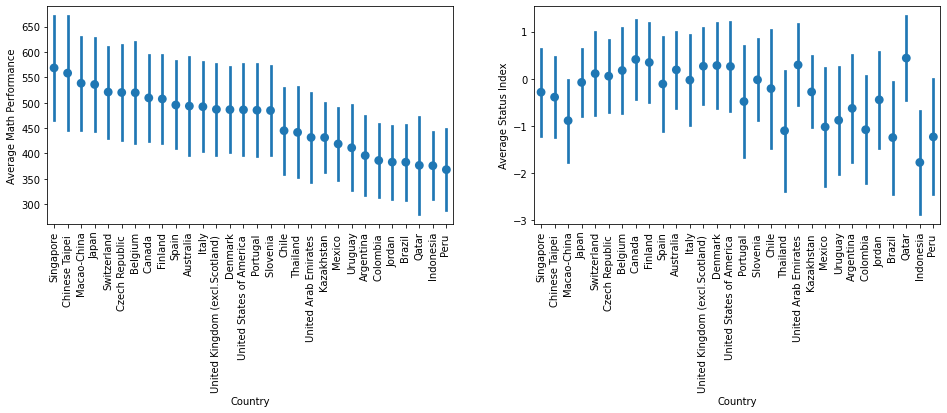

In [78]:
# order top 25 countries by their average student math score
math_order = subpisa_cnt.avg_math_score.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of math score to show their average math score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = subpisa, x = 'country', y = 'avg_math_score', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Math Performance')
plt.xticks(rotation = 90);
# plot the countries in order of math score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = subpisa, x = 'country', y = 'status_index', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90);

### Answer:
Overally, countries with higher avg_status_index perform good (above 500) and countries with lower avg_status_index do not have a very good performance(below 450). However, some countries like Qatar,UAE and China go against this trend.

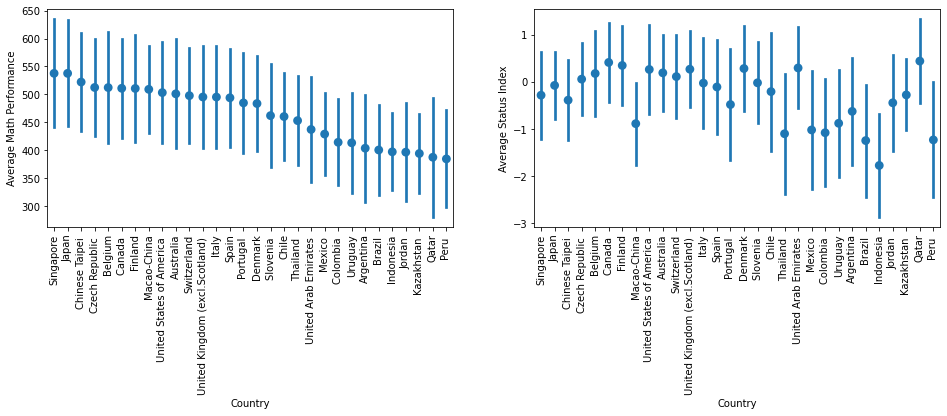

In [79]:
# order top 30 countries by their average student math score
math_order = subpisa_cnt.avg_read_score.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of math score to show their average math score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = subpisa, x = 'country', y = 'avg_read_score', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Math Performance')
plt.xticks(rotation = 90);
# plot the countries in order of math score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = subpisa, x = 'country', y = 'status_index', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90);

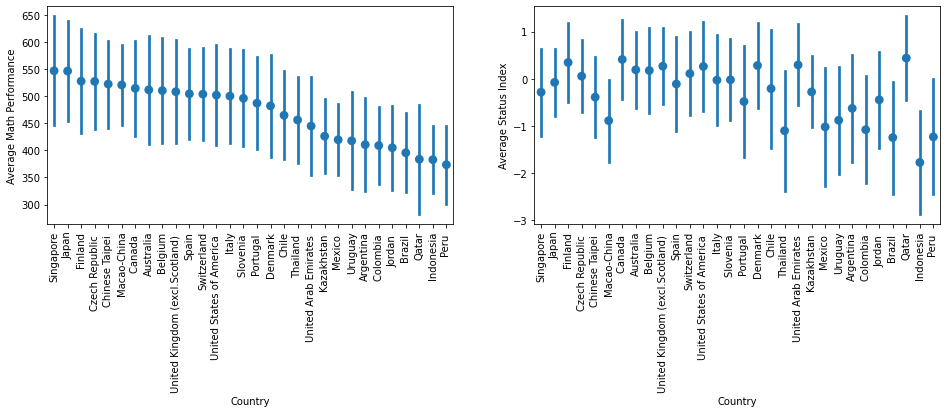

In [80]:
# order top 30 countries by their average student math score
math_order = subpisa_cnt.avg_science_score.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of math score to show their average math score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = subpisa, x = 'country', y = 'avg_science_score', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Math Performance')
plt.xticks(rotation = 90);
# plot the countries in order of math score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = subpisa, x = 'country', y = 'status_index', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90);

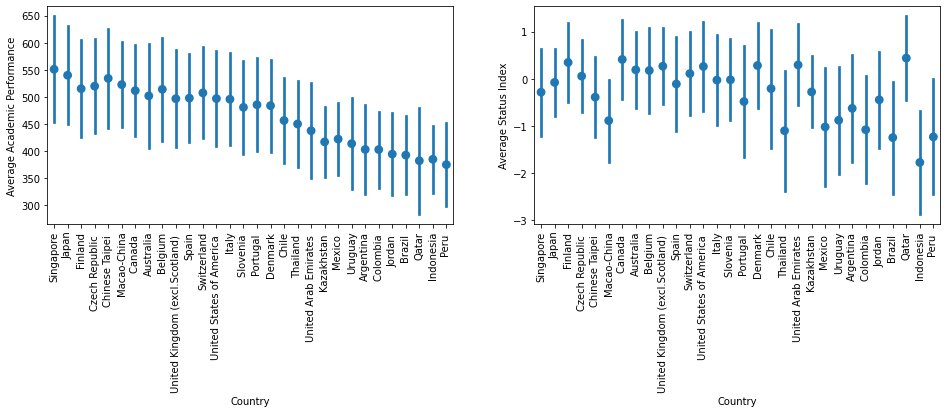

In [81]:
# order top 30 countries by their average student math score
math_order = subpisa_cnt.avg_science_score.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of math score to show their average math score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = subpisa, x = 'country', y = 'academic_avg', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Academic Performance')
plt.xticks(rotation = 90);
# plot the countries in order of math score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = subpisa, x = 'country', y = 'status_index', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90);

### Answer:
Overally, countries with higher avg_status_index perform good (above 500) and countries with lower avg_status_index do not have a very good performance(below 450). However, some countries like Qatar,UAE and China go against this trend.
Thus, we can consider status index of the countries as an indicator of their student's performance - although there are exceptions.

# OECD Status and Performance

#### Questions to be answered here:
Does a country's partnership with the OECD goals contribute to academic performance?

Do OECD countries neccessarily have better status index? 

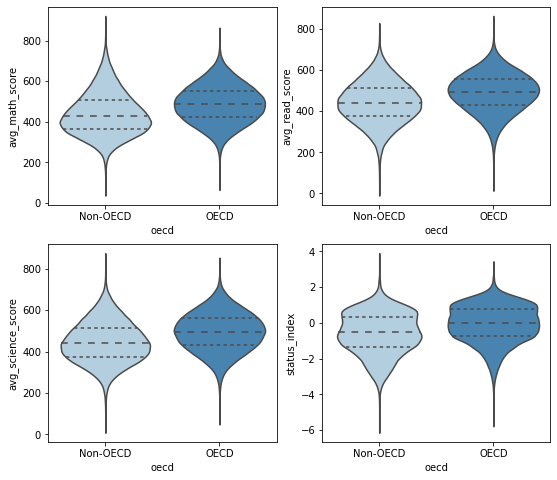

In [82]:
# explore the relationship between country OECD partnership and academic performance as well as family social status
plt.figure(figsize = (9,8))
plt.subplot(221)
sb.violinplot(data = subpisa, x = 'oecd', y = 'avg_math_score', palette = 'Blues', inner = 'quartile');
plt.subplot(222)
sb.violinplot(data = subpisa, x = 'oecd', y = 'avg_read_score', palette = 'Blues', inner = 'quartile');
plt.subplot(223)
sb.violinplot(data = subpisa, x = 'oecd', y = 'avg_science_score', palette = 'Blues', inner = 'quartile');
plt.subplot(224)
sb.violinplot(data = subpisa, x = 'oecd', y = 'status_index', palette = 'Blues', inner = 'quartile');

### Answer:
The average performance and status index of OECD countries is slightly better than non-OECD countries. The difference is almost the same for all three subjects. 

# Instructional Time and Academic Performances

#### Questions to be answered here:

How efficient is education at schools? Do more 'math_min' (the amount of minutes per week math is taught) result in better math score?

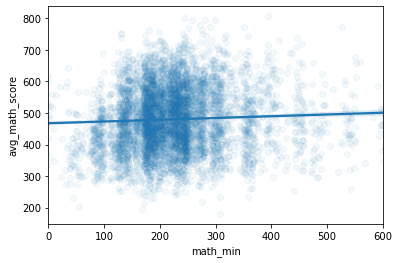

In [83]:
# explore relatonship between math instruction minutes and performance
sb.regplot(data = subpisa.sample(10000), x = 'math_min', y = 'avg_math_score', x_jitter = 10, scatter_kws = {'alpha': 0.05});
# set instructional minute range to the focus on the majority of students
plt.xlim(0,600);

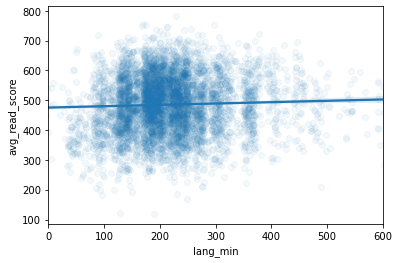

In [84]:
# explore relationship between language instructional minutes and reading performance
sb.regplot(data = subpisa.sample(10000), x = 'lang_min', y = 'avg_read_score', x_jitter = 10, scatter_kws = {'alpha': 0.05});
# set instructional minute range to the focus on the majority of students
plt.xlim(0,600);

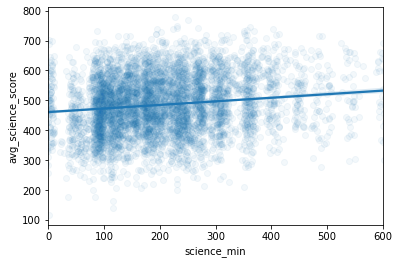

In [85]:
# explore relationship between science instructional minutes and performance
sb.regplot(data = subpisa.sample(10000), x = 'science_min', y = 'avg_science_score', x_jitter = 10, scatter_kws = {'alpha': 0.05});
# set instructional minute range to the focus on the majority of students
plt.xlim(0,600);

### Answer:
We can see how different average scores are spreading across different instructional minutes. Thus,
that average scores seems not be strongly related to the instructional minutes.
An increase in instructional minutes had resulted in:

A marginal increase in average science scores,

insignificant increase in average math scores,

no change in average reading scores.


# Immigration Generation vs. Academic Performance

#### Questions to be answered here:
Does the families immigration history influence student acacdemic performance?

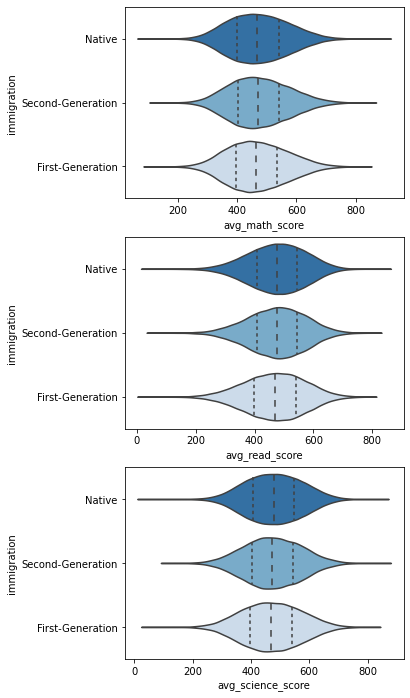

In [89]:
# graph the relationship between immigration generation across all three academic areas of performance
plt.figure(figsize=(5,12))
plt.subplot(311)
sb.violinplot(data = subpisa, y = 'immigration', x = 'avg_math_score', inner = 'quartile', palette = 'Blues_r');
plt.subplot(312)
sb.violinplot(data = subpisa, y = 'immigration', x = 'avg_read_score', inner = 'quartile', palette = 'Blues_r');
plt.subplot(313)
sb.violinplot(data = subpisa, y = 'immigration', x = 'avg_science_score', inner = 'quartile', palette = 'Blues_r');

 ### Answer:
 It seems that immigration has almost no influence in academic performance of the students: The median of average score for all three groups in each subject is the same and the distribution is pretty normal.

# Parental Education vs. Student Academics

#### Questions to be answered here:
1. How does the academic achievement of parents relate to the academic achievement of their children? 

2. Why this happens? 

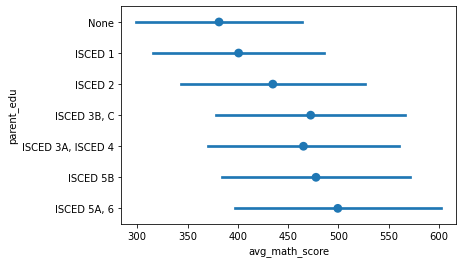

In [90]:
# graph the relationship between highest parental education and student math score
sb.pointplot(data = subpisa, y = 'parent_edu', x = 'avg_math_score', ci = 'sd', linestyles = "");

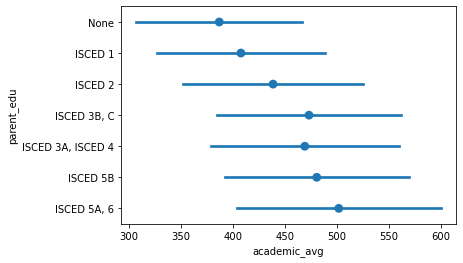

In [91]:
# graph the relationship between highest parental education and student math score
sb.pointplot(data = subpisa, y = 'parent_edu', x = 'academic_avg', ci = 'sd', linestyles = "");

### Answer-1:
From the chart above, it can clearly be seen that as the deucation level of parents increases there would also be an increase in academic performance.  The level of parental education is strongly correlated to the level of student achievement.

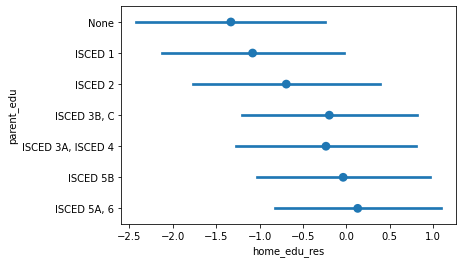

In [92]:
# graph the relationship between highest parental education and access to home educational resources
sb.pointplot(data = subpisa, y = 'parent_edu', x = 'home_edu_res', ci = 'sd', linestyles = "");

### Answer -2:
According to this chart, more educated parents provide their children with more educational resources. This might be one reason why the children of more educated parents have better academic performances.

# Parental Occupation Status vs. Academic Performance

#### Questions to be answered here:
Does parental occupation influence the student's performance?

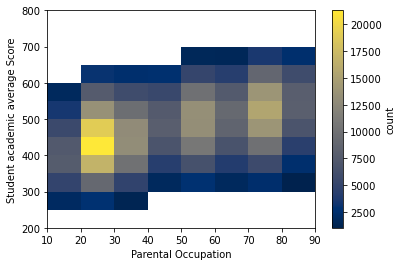

In [93]:
# establish bin boundaries for parent occupation scores
occ_bins = np.arange(10,95,10)
# establish bin boundaries for student academic scores
score_bins = np.arange(200,850,50)

# graph the density of points relating parental occupation to student academic performance
plt.hist2d(data = subpisa, x = 'parent_occ', y = 'academic_avg', bins = [occ_bins, score_bins], cmin = 1000, cmap = 'cividis')
plt.colorbar(label = 'count')
plt.xlabel('Parental Occupation')
plt.ylabel('Student academic average Score');

### Answer:
The yellow boxes(more populated areas) shift upward right in the chart which means there is a strong correlation between parental occupation and academic achievement of the student. However, each occupational level consists of almost all kind of scores.

# Preschool Effect on Academic Performance

#### Questions to be answered here:

What is the effect of early childhood education (preschool) on student academic performance?

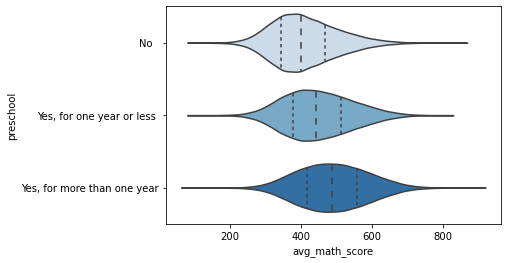

In [94]:
# graph the distribution of math performance according to preschool experience
sb.violinplot(data = subpisa, y = 'preschool', x = 'avg_math_score', inner='quartile', palette = 'Blues');

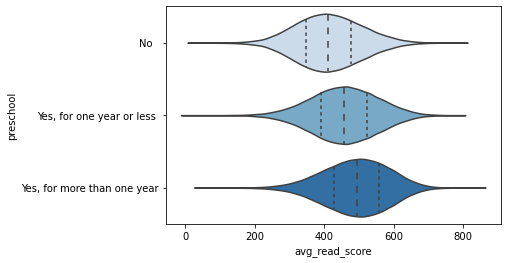

In [95]:
# graph the distribution of math performance according to preschool experience
sb.violinplot(data = subpisa, y = 'preschool', x = 'avg_read_score', inner='quartile', palette = 'Blues');

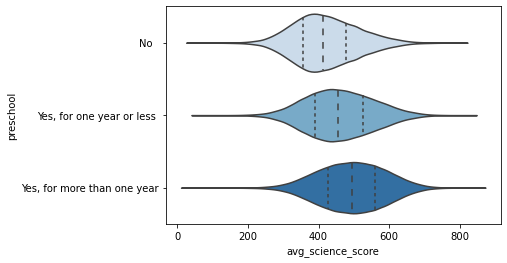

In [96]:
# graph the distribution of math performance according to preschool experience
sb.violinplot(data = subpisa, y = 'preschool', x = 'avg_science_score', inner='quartile', palette = 'Blues');

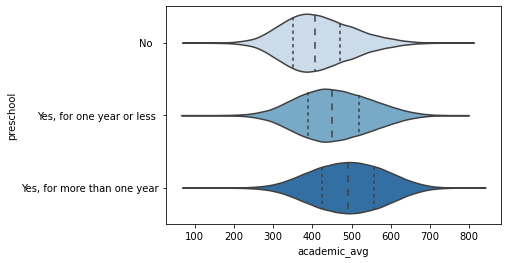

In [97]:
# graph the distribution of math performance according to preschool experience
sb.violinplot(data = subpisa, y = 'preschool', x = 'academic_avg', inner='quartile', palette = 'Blues');

### Answer:

It seems that children who had attended the preschool are capabale of achieving better scores with around 30 to 50 scores more than the students who did not go to preschool.

# Family Structure and Status and Student Performance 

#### Questions to be answered here:

1. Is social status index a good measure for performance?
2. Does the number of parents affect the performance?
3. what is the relationship between status index and number of parents? 
(investigating the correlation between social index and each variable is being carried out since we want to see what soical index exactly tell us. Finding more linear relationships helps us use soical index as a measure (using interchangeably) of too many variables like resources, good or bad occupation status and etc.)

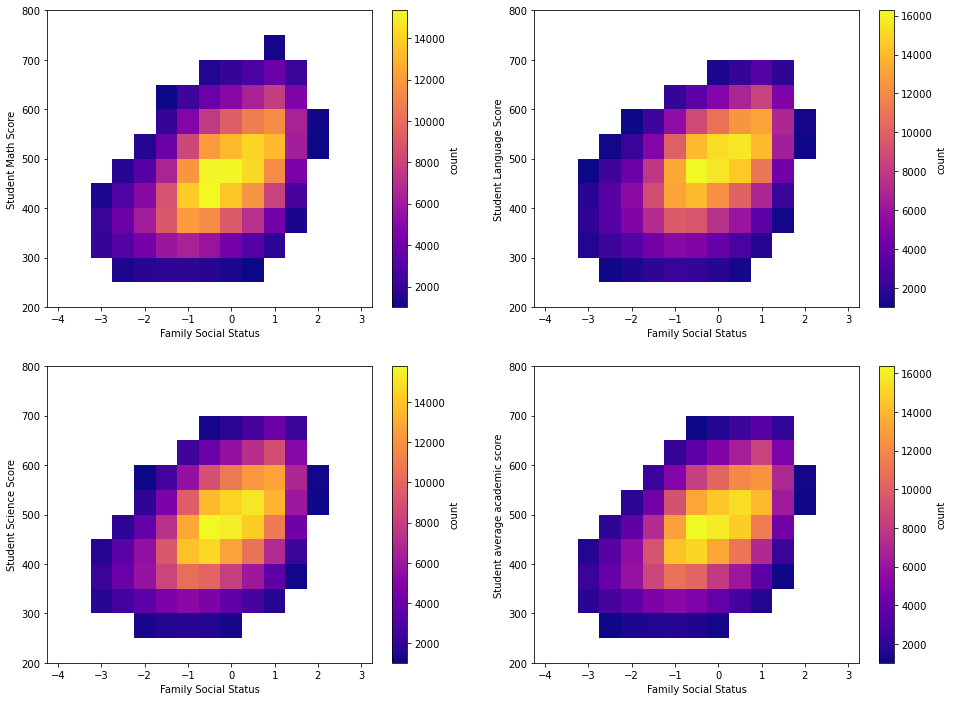

In [98]:
# establish bin structure for standardized score of social status and student confidence
std_bins = np.arange(-4.25,3.5,0.5)
# establish bin structure for academic scores
score_bins = np.arange(200,850,50)

plt.figure(figsize = (16, 12))
plt.subplot(221)
# plot density of family social status and math score
plt.hist2d(data = subpisa, x = 'status_index', y = 'avg_math_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'plasma')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Math Score');
plt.subplot(222)
# plot density of family social status and reading score
plt.hist2d(data = subpisa, x = 'status_index', y = 'avg_read_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'plasma')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Language Score');
plt.subplot(223)
# plot density of family social status and science score
plt.hist2d(data = subpisa, x = 'status_index', y = 'avg_science_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'plasma')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Science Score');
plt.subplot(224)
# plot density of family social status and average academic score
plt.hist2d(data = subpisa, x = 'status_index', y = 'academic_avg', bins = [std_bins, score_bins], cmin = 1000, cmap = 'plasma')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student average academic score');

### Answer-1:
Higher family social status is related to stronger academic performance. 

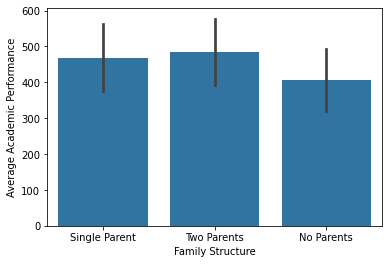

In [99]:
# plot the distribution of math scores according to family parental structure
ax = sb.barplot(data = subpisa, x = 'fam_struct', y = 'academic_avg', ci = 'sd', color = base_color);
ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
plt.xlabel('Family Structure')
plt.ylabel('Average Academic Performance');

#### Answer-2:
The performance of students with at least one parent is obviusly better than children with none.

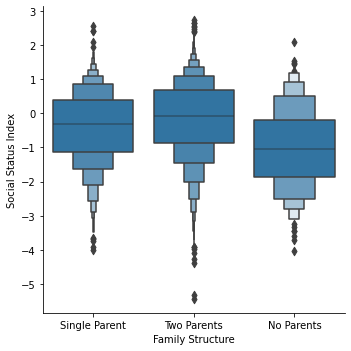

In [100]:
# plot the distribution of social status according to family parental structure
ax = sb.catplot(data = subpisa.sample(10000), x = 'fam_struct', y = 'status_index', kind = 'boxen', color = base_color);
ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
plt.xlabel('Family Structure')
plt.ylabel('Social Status Index');

### Answer-3: 
 Social status index of families with two parents is better than that of single parent and the social index of the single parent family is obviusly better than index of the families with none. 

# Internet, cellphone, video games

#### Questions to be answered here:

1. Does accessing to internet negatively affect the student's performance?
2. Does playing video games decrease the student's score?
3. Is having a cell phone bad regarding students performance?

C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sami\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


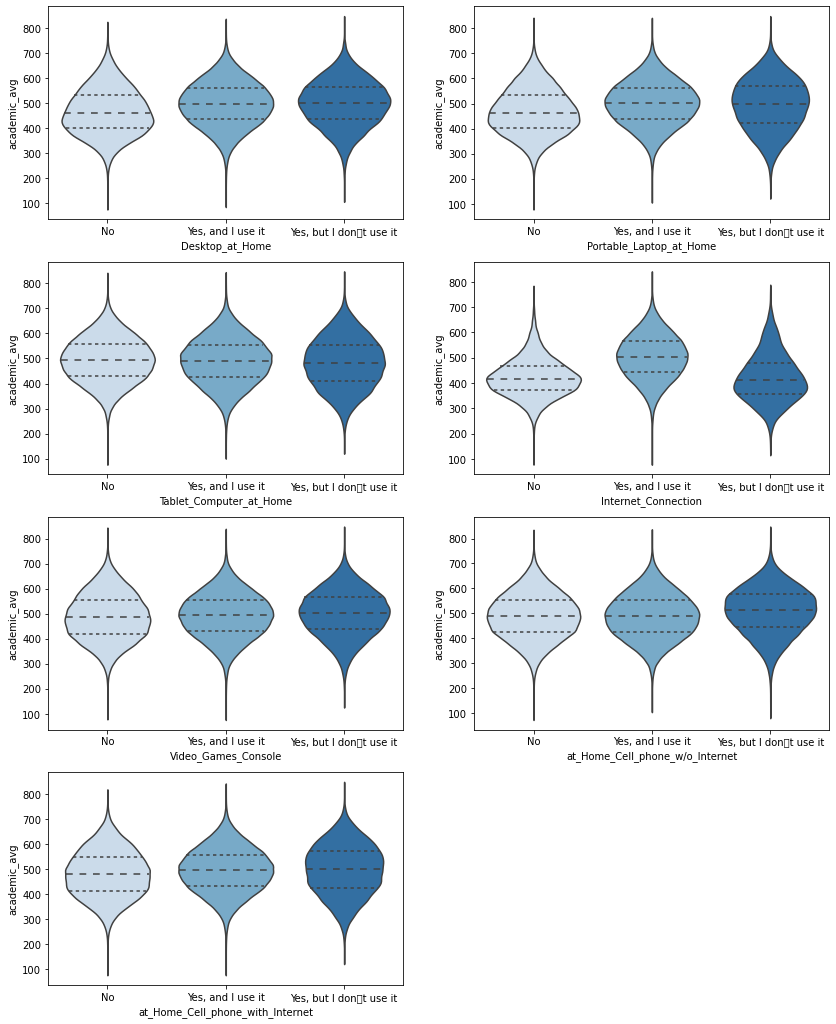

In [101]:

plt.figure(figsize = (14,18))
plt.subplot(421)
sb.violinplot(data = subpisa, x = 'Desktop_at_Home', y = 'academic_avg', inner='quartile', palette = 'Blues');
plt.subplot(422)
sb.violinplot(data = subpisa, x = 'Portable_Laptop_at_Home', y = 'academic_avg', inner='quartile', palette = 'Blues');
plt.subplot(423)
sb.violinplot(data = subpisa, x = 'Tablet_Computer_at_Home', y = 'academic_avg', inner='quartile', palette = 'Blues');
plt.subplot(424)
sb.violinplot(data = subpisa, x = 'Internet_Connection', y = 'academic_avg', inner='quartile', palette = 'Blues');
plt.subplot(425)
sb.violinplot(data = subpisa, x = 'Video_Games_Console', y = 'academic_avg', inner='quartile', palette = 'Blues');
plt.subplot(426)
sb.violinplot(data = subpisa, x = 'at_Home_Cell_phone_w/o_Internet', y = 'academic_avg', inner='quartile', palette = 'Blues');
plt.subplot(427)
sb.violinplot(data = subpisa, x = 'at_Home_Cell_phone_with_Internet', y = 'academic_avg', inner='quartile', palette = 'Blues');




#### Answers:
First noticable informations is that having an internet connection has positively contributed to performance.
Having or not having and playing or not playing video games seems to have nothing to do with scores.
Having or not having and using or not using cell phones seems to have nothing to do with scores

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Preschool experience seems to be leading to higher academic performance.

Parental occupation status and student academic performance are correlated.


Family parental structure affects the status index and academic performance. It seems that having a normal two-parents family is an advantage.

There is a positive relationship between social index and performance.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Gender is related to language score (but not math or science). 
Student performance by country and average status index by country has a few exceptions that may be worth investigating.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

# Early Education and Reading
Does the preschool advantage still hold even for adolescent?

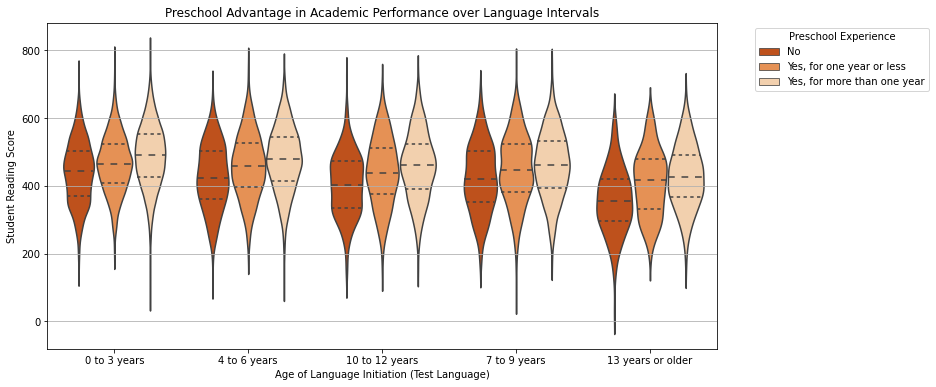

In [102]:
plt.figure(figsize=(12,6))

# analyze preschool experience, age of language initiation, and reading performance
plt.grid(True)
sb.violinplot(data = subpisa, y = 'avg_read_score', x = 'age_lang_start', hue = 'preschool', scale = 'area', inner = 'quartile', palette = 'Oranges_r');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title= "Preschool Experience");
plt.ylabel('Student Reading Score');
plt.xlabel('Age of Language Initiation (Test Language)');
plt.title('Preschool Advantage in Academic Performance over Language Intervals');

### Answer:
Taking a preschool course seems to be beneficial for reading skills even for people who want to start learning the language in older ages. The chart also indicates that, the more the years of preschool experience, better the performance would be.

# Parent Occupation, and Social Status
I want to make sure that there is a relationship between occupation and social status independant of education level.


#### Questions to be answered here:

Do parental occupation level contribute significantly to social status? 



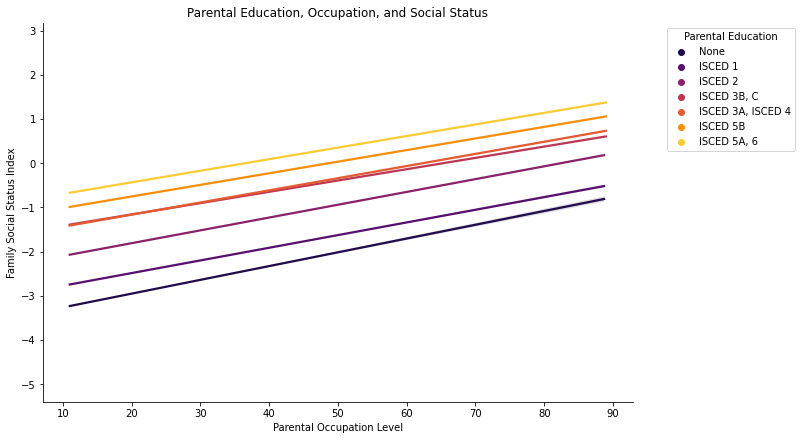

In [103]:

# plot the relationship for parental occupation and family social status across all levels of parental education
g = sb.FacetGrid(data = subpisa, hue = 'parent_edu', palette = 'inferno', height = 6, aspect = 1.5);

# individual points will not be plotted to keep the graph simple and easy to read
g.map(sb.regplot, 'parent_occ', 'status_index', scatter_kws = {'alpha': 0});

# make the colors visible in the key so that the levels of parental education are clear
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title = "Parental Education");
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.ylabel('Family Social Status Index');
plt.xlabel('Parental Occupation Level');
plt.title('Parental Education, Occupation, and Social Status');

This plot shows that higher occupational level guarantees higher status index. in occupational level one can probably elevate her or his status index by achieving higher educational degrees. 

# Parental Education, Family Social Status, and Performance
Does family social status still have a relationship with student academic performance if we separate each level of parental education? 

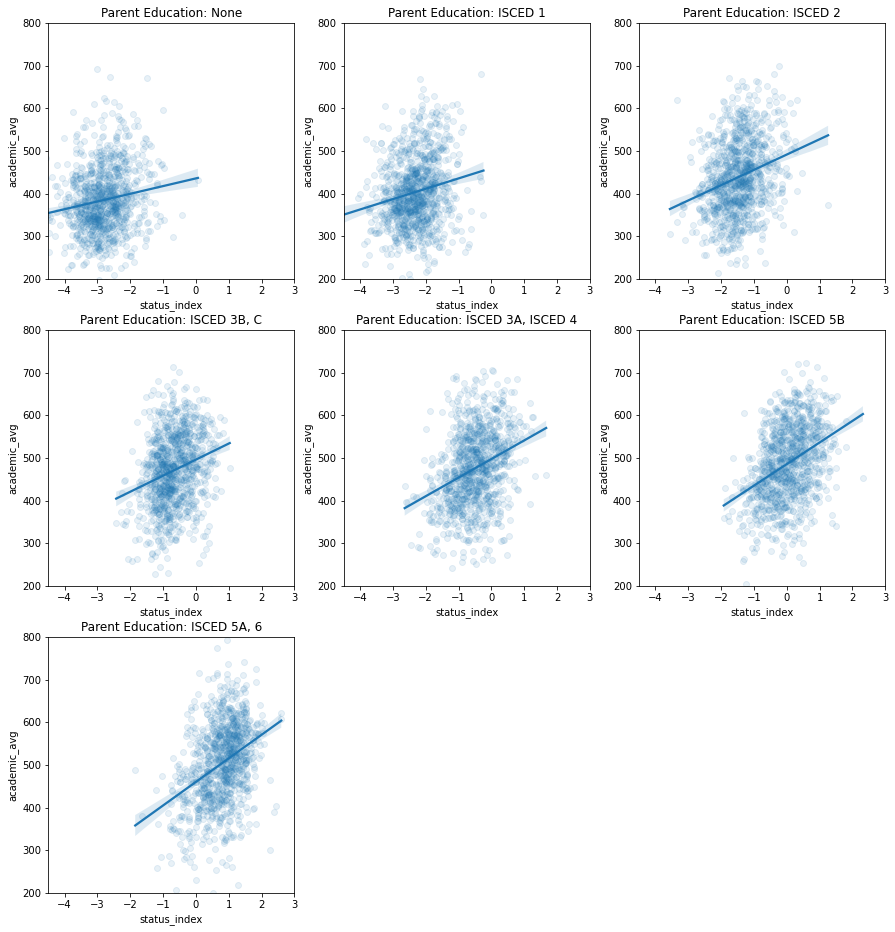

In [104]:
plt.figure(figsize = (15, 16));

# counter variable for proper subplot placement
i = 0;

# loop through each level of parental education from least to most
for _ in subpisa.parent_edu.unique().sort_values():
    # if the level of parental education is given, then plot the graph
    if _ == _:
        plt.subplot(3,3,i+1)
        # label the graph with the appropriate level of education
        plt.title('Parent Education: {}'.format(_));
        # for consistent comparison, take a sample of 1000 from that level of parental education
        sub_data = subpisa[subpisa['parent_edu'] == _].sample(1000)
        sb.regplot(data = sub_data, x = 'status_index', y = 'academic_avg', scatter_kws = {'alpha':0.1});
        plt.xlim(-4.5,3);
        plt.ylim(200,800);
        i += 1;

the families status is a positive predictor of student academic performance. This trend exists in every educational level.

Limitation: there is still a broad spread of academic scores at similar educational levels.

# Family Parental Structure, Status Index, and Academic Performance
How does the family parental structure effect the relationship between family social status and student academic performance?

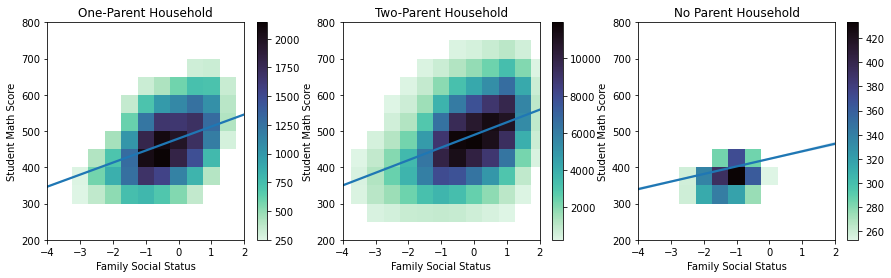

In [105]:
# descriptive titles for the different family structures in the survey
households = ['One-Parent', 'Two-Parent', 'No Parent']
plt.figure(figsize = (15, 4));

# counter variable for proper subplot placement
i = 0;

# loop through the three different family structures
for _ in subpisa.fam_struct.value_counts().index.sort_values():
    plt.subplot(1,3,i+1)
    plt.grid(True)
    # title each graph appropriately
    plt.title('{} Household'.format(households[int(_)-1]));
    # collect the appropriate data for the current family structure
    sub_data = subpisa[subpisa['fam_struct'] == _]
    # plot a 2-dimension histogram (heatmap) of family social status and math score
    plt.hist2d(data = sub_data, x = 'status_index', y = 'avg_math_score', bins = [std_bins, score_bins], cmin = 250, cmap = 'mako_r');
    # plot a least-squares regression line to further illustrate the relationship
    sb.regplot(data = sub_data, x = 'status_index', y = 'avg_math_score', scatter_kws = {'alpha':0})
    plt.xlim(-4,2);
    plt.ylim(200,800);
    plt.xlabel('Family Social Status');
    plt.ylabel('Student Math Score');
    plt.colorbar();
    i += 1;

Not only would that be very difficult for families with no parents to improve their family social status but also even with social status improved the performance improvement of the student is less in these families. Hoever, no reverse trend is seen. social status can be a good indicator of academic performance in every family structure.

### Correlation between Quantitative Variables

Have an overview on correlative Quantitative Variables


<AxesSubplot:>

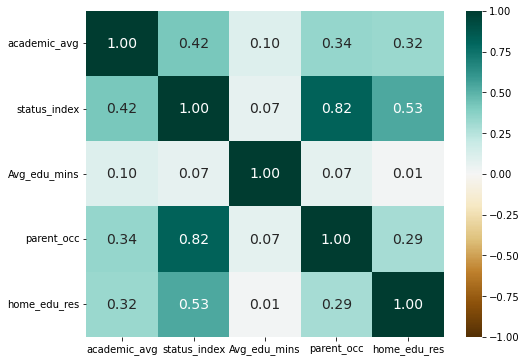

In [106]:

# identify quantitative variables of interest for this correlation map
pisa_stats= ['academic_avg','status_index', 'Avg_edu_mins','parent_occ', 'home_edu_res']
plt.figure(figsize = (8,6))
# graph the correlation map to quantify the strength of relationship between each quantitative variable of interest
sb.heatmap(subpisa[pisa_stats].corr(), cmap='BrBG', annot=True, fmt='.2f', vmin = -1, annot_kws={"fontsize":14})

### Answer:
As analaysed before, the strongest influence on students performance rises from socio-economic status with correlation index of 0.42. since socio economic status has a positivie relationship with parents jobs, education, resources, family structure and the country the student is living in, there's no surprise that correlation index between these variables and status index be high.

# Country Status-Performance Exceptions
Although in previuos explorations (sort of) a linear relationship was found between social status and performance of the coutnries, some countries performed significantly above their average social status, while others performed significantly below their average social status. In this investigation, a data subset is created for the country data. A performance milestone is calculated for comparison purposes:
the ranking of the country in averegae academic performance among other countries / the ranking of the country in soical status among other countries
For example, from previous observations we know that China's academic performance is high in contrast with its low social index. Thus we expect the china to have a milestone greater than 1 since its academic performance ranking is better than its soical status ranking.

In [107]:
# calculate an academic average for each student
subpisa['academic_avg'] = (subpisa.avg_math_score + subpisa.avg_read_score + subpisa.avg_science_score)/3


In [108]:
# produce a subset of the dataframe that organizes the average information by country
pisa_country_data = subpisa.groupby('country').mean()

In [109]:
# investigate which variables are present in the country data (quantitative variables)
pisa_country_data.columns

Index(['student_id', 'age_edu_start', 'parent_occ', 'status_index',
       'fam_struct', 'home_edu_res', 'avg_math_score', 'avg_read_score',
       'avg_science_score', 'lang_min', 'math_min', 'science_min',
       'academic_avg', 'Avg_edu_mins'],
      dtype='object')

In [110]:
pisa_country_data.academic_avg.value_counts()

396.681895    1
481.832999    1
522.702057    1
414.408681    1
422.356547    1
             ..
495.826453    1
540.020395    1
394.683219    1
417.146233    1
515.730015    1
Name: academic_avg, Length: 66, dtype: int64

In [111]:
# calculate performance milestone. 
pisa_country_data['performance'] = (pisa_country_data.academic_avg.rank(pct = True)) / (pisa_country_data.status_index.rank(pct = True))
pisa_country_data.performance.describe()

count    65.000000
mean      2.092521
std       6.668101
min       0.031265
25%       0.716253
50%       0.962963
75%       1.282593
max      54.166667
Name: performance, dtype: float64

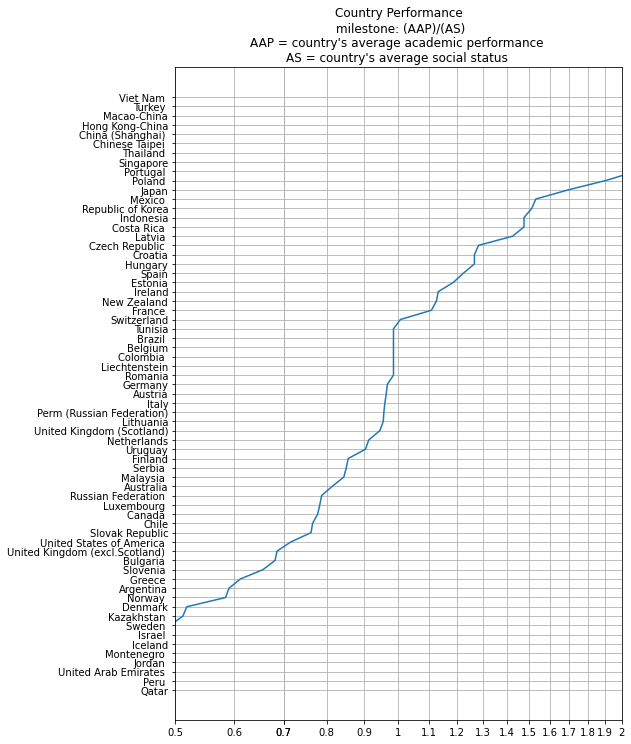

In [112]:
# gather the countries and their respective performance indices
countries = pisa_country_data.performance.sort_values().dropna().index
perform = pisa_country_data.performance.sort_values().dropna().values
plt.figure(figsize = (8, 12));
plt.grid(True)

# plot each country and its performance index to show the distribution across all countries
plt.plot(perform, countries);
plt.title('Country Performance\n milestone: (AAP)/(AS)\nAAP = country\'s average academic performance \nAS = country\'s average social status ')
plt.xscale('log');
plt.xticks([]);
ax = plt.gca();
ax.axes.xaxis.set_ticks([.1, .2, 0.3, 4, .5, .6, .7, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1]);
ax.axes.set_xticklabels([.1, .2, 0.3, 4, .5, .6, .7, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1]);
plt.xlim(.5, 2);

In [113]:
# print the minimum and maximum performance indices to better understand the range
print('Minimum Performance Index: {0:.2f}\nMaximum Performance Index: {1:.2f}'.format(pisa_country_data.performance.min(), pisa_country_data.performance.max()))

Minimum Performance Index: 0.03
Maximum Performance Index: 54.17


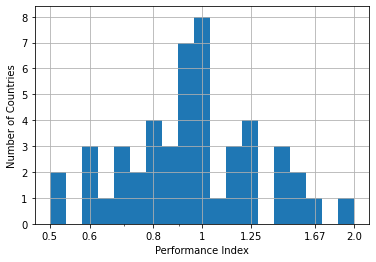

In [114]:
# plot a histogram of the distribution of performance indices for better analysis of the outliers
logbins = np.logspace(np.log10(0.5),np.log10(2),20)
plt.grid(True)
plt.hist(pisa_country_data.performance, bins = logbins);
plt.xscale('log');
plt.xticks([.5, .6, 0.8, 1, 1.25, 1.67, 2.0], [.5, .6, 0.8, 1, 1.25, 1.67, 2.0])
plt.xlabel('Performance Index');
plt.ylabel('Number of Countries');

In [115]:
# gather the list of the top 10 countries according to performance index
upper_countries = pisa_country_data.performance.sort_values(ascending = False).dropna().head(10).index
# gather the list of the bottom 10 countries according to performance index
lower_countries = pisa_country_data.performance.sort_values(ascending = True).dropna().head(10).index
# display the countries in each of the top 10 or bottom 10 of performance data
print("Countries with a high performance index: {}".format(', '.join(upper_countries.tolist())))
print("Countries with a low performance index: {}".format(', '.join(lower_countries.tolist())))

Countries with a high performance index: Viet Nam , Turkey , Macao-China, Hong Kong-China, China (Shanghai) , Chinese Taipei , Thailand , Singapore, Portugal , Poland 
Countries with a low performance index: Qatar, Peru , United Arab Emirates , Jordan , Montenegro , Iceland, Israel , Sweden , Kazakhstan , Denmark


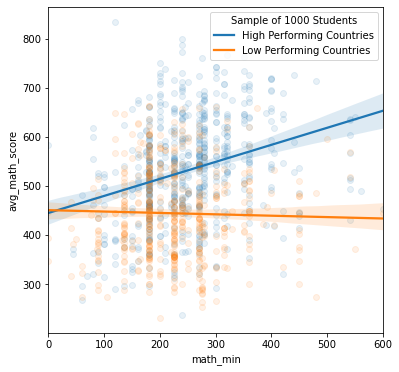

In [116]:
plt.figure(figsize = (6, 6))
# sample 1000 students from high performing countries, plot a linear regression of instructional minutes and academic performance
sb.regplot(data = subpisa[subpisa['country'].isin(upper_countries)].sample(1000), x = 'math_min', y = 'avg_math_score', scatter_kws = {'alpha':0.1});
# sample 1000 students from low performing countries, plot a linear regression of instructional minutes and academic performance
sb.regplot(data = subpisa[subpisa['country'].isin(lower_countries)].sample(1000), x = 'math_min', y = 'avg_math_score', scatter_kws = {'alpha':0.1});
plt.legend(['High Performing Countries','Low Performing Countries'], title = 'Sample of 1000 Students');
plt.xlim(0, 600);

Although a wide range of instructional minutes and academic performance are observed, there are two distinct trends for high and low performing countries. Although we had concluded from previuos analysis that more educational minutes does not mean better scores, it seems that high performing countries - which represent as outliers in social index vs scores chart- know how to make use of the classes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### 1. A better job yields in a higher soical status. 
from previous analysis we know that (in most cases) higher soical index results in higher academic score. Thus, a better job (in most cases) results in better score.
This is what we had observed in another analysis where we saw how parantal accupation positively correlates with scores.

#### 2. The positive relationship between academic performance and parents' education level keeps holding in each educational levels.
This is in accordance with the overall result of investigating the performance regarding the education.

#### 3. The positive relationship between academic performance and the family structure keeps holding in each structure alone.

### Were there any interesting or surprising interactions between features?

1. Preschooling is not only beneficial for children. This experience facilitates the process of learning even for adolscents. It seems to me that this steams from the human brain's need for getting acquainted with every process before seriously starting it.

2. Although we obsereved that learning times seem to be inefficient for most subjects, while deviding the dataset by countries and measuring the relationship again, we noticed that in some countries these instructional minutes are actually working so well. These were countries that considered to be outliers in status_index vs score plot.

### Conclusion

As a girl borned and rasied in a developing country, I have always been told that "stars shine in the dark". However, as I grew up, I could see that this idea won't work in real world situations.
Human being needs care, welfare, healthy body and environment and access to resources to nourish and shine.